# Credit Ratings on Fixed Quarter Dates with Earnings Call Date for Linkup

Get credit ratings on fixed quarter dates.

Use list of earnings call dates to find the preceding earnings call date.

In [1]:
# packages
import pandas as pd
import pandasql as ps

In [2]:
# Load credit ratings data
# C:\Users\ijyli\Box\STAT 222 Capstone\Intermediate Data\combined_credit_rating_data.csv
credit_ratings = pd.read_csv('~/Box/STAT 222 Capstone/Intermediate Data/combined_credit_rating_data.csv')
# Rename Date to rating_date, Next Rating Date or End of Data to next_rating_date_or_end_of_data, Symbol to ticker
credit_ratings = credit_ratings.rename(columns={'Date': 'rating_date', 'Next Rating Date or End of Data': 'next_rating_date_or_end_of_data', 'Symbol': 'ticker'})
# Create year variable from rating_date
credit_ratings['Year'] = pd.to_datetime(credit_ratings['rating_date']).dt.year
# Limit rating agency and scope
credit_ratings = credit_ratings[credit_ratings['Rating Agency Name'].str.contains('Standard & Poor\'s') & (credit_ratings['Year'] >= 2010) & (credit_ratings['Year'] <= 2016)]
credit_ratings

,Rating,ticker,Rating Agency Name,rating_date,Source,Rating Rank AAA is 10,Next Rating,Next Rating Date,Previous Rating,Previous Rating Date,next_rating_date_or_end_of_data,Type,Change in Rating,Year
5560,AAA,AAPL,Standard & Poor's Ratings Services,2014-04-24,Supplementary,10,AA,2014-05-27,NaN,NaN,2014-05-27,Ambiguous,NaN,2014
5561,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,Downgrade,-1.0,2014
5562,AA,AAPL,Standard & Poor's Ratings Services,2015-02-18,Supplementary,9,AA,2015-05-28,AA,2014-05-27,2015-05-28,Affirmation,0.0,2015
5563,AA,AAPL,Standard & Poor's Ratings Services,2015-05-28,Both,9,AA,2015-06-02,AA,2015-02-18,2015-06-02,Affirmation,0.0,2015
5564,AA,AAPL,Standard & Poor's Ratings Services,2015-06-02,Supplementary,9,AA,2015-08-25,AA,2015-05-28,2015-08-25,Affirmation,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,BBB,ZTS,Standard & Poor's Ratings Services,2014-01-31,Both,7,BBB,2015-01-30,BBB,2013-10-11,2015-01-30,Affirmation,0.0,2014
8728,BBB,ZTS,Standard & Poor's Ratings Services,2015-01-30,Both,7,BBB,2015-11-03,BBB,2014-01-31,2015-11-03,Affirmation,0.0,2015
8729,BBB,ZTS,Standard & Poor's Ratings Services,2015-11-03,Supplementary,7,BBB,2016-01-22,BBB,2015-01-30,2016-01-22,Affirmation,0.0,2015
8730,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,Affirmation,0.0,2016


In [3]:
# Create dataset of these dates from 2010 to 2016
# 1/1, 4/1, 7/1, 10/1
fixed_quarter_dates = pd.DataFrame({'fixed_quarter_date': ['2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01', 
                                                           '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01', 
                                                           '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01', 
                                                           '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01', 
                                                           '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01', 
                                                           '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01', 
                                                           '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01']})
fixed_quarter_dates['fixed_quarter_date'] = pd.to_datetime(fixed_quarter_dates['fixed_quarter_date'])
fixed_quarter_dates

,fixed_quarter_date
0,2010-01-01
1,2010-04-01
2,2010-07-01
3,2010-10-01
4,2011-01-01
5,2011-04-01
6,2011-07-01
7,2011-10-01
8,2012-01-01
9,2012-04-01


## Join together

In [4]:
query = '''
SELECT a.*, b.fixed_quarter_date
FROM credit_ratings a
INNER JOIN fixed_quarter_dates b
ON a.rating_date <= b.fixed_quarter_date
    AND b.fixed_quarter_date <= a.next_rating_date_or_end_of_data
'''

# Run query
credit_ratings_on_fixed_quarter_dates = ps.sqldf(query, locals())
credit_ratings_on_fixed_quarter_dates

,Rating,ticker,Rating Agency Name,rating_date,Source,Rating Rank AAA is 10,Next Rating,Next Rating Date,Previous Rating,Previous Rating Date,next_rating_date_or_end_of_data,Type,Change in Rating,Year,fixed_quarter_date
0,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,Downgrade,-1.0,2014,2014-07-01 00:00:00.000000
1,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,Downgrade,-1.0,2014,2014-10-01 00:00:00.000000
2,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,Downgrade,-1.0,2014,2015-01-01 00:00:00.000000
3,AA,AAPL,Standard & Poor's Ratings Services,2015-02-18,Supplementary,9,AA,2015-05-28,AA,2014-05-27,2015-05-28,Affirmation,0.0,2015,2015-04-01 00:00:00.000000
4,AA,AAPL,Standard & Poor's Ratings Services,2015-06-02,Supplementary,9,AA,2015-08-25,AA,2015-05-28,2015-08-25,Affirmation,0.0,2015,2015-07-01 00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,BBB,ZTS,Standard & Poor's Ratings Services,2015-01-30,Both,7,BBB,2015-11-03,BBB,2014-01-31,2015-11-03,Affirmation,0.0,2015,2015-10-01 00:00:00.000000
9113,BBB,ZTS,Standard & Poor's Ratings Services,2015-11-03,Supplementary,7,BBB,2016-01-22,BBB,2015-01-30,2016-01-22,Affirmation,0.0,2015,2016-01-01 00:00:00.000000
9114,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,Affirmation,0.0,2016,2016-04-01 00:00:00.000000
9115,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,Affirmation,0.0,2016,2016-07-01 00:00:00.000000


In [5]:
# Check for uniqueness by ticker and fixed_quarter_date
fq_rating_cnt = credit_ratings_on_fixed_quarter_dates.groupby(['ticker', 'fixed_quarter_date']).size().reset_index(name='count').sort_values(by='count', ascending=False)
fq_rating_cnt[fq_rating_cnt['count'] > 1].sort_values(by=['fixed_quarter_date'])

,ticker,fixed_quarter_date,count


In [6]:
# If they exist, delete columns "Type", "Change in Rating"
if 'Type' in credit_ratings_on_fixed_quarter_dates.columns:
    credit_ratings_on_fixed_quarter_dates = credit_ratings_on_fixed_quarter_dates.drop(columns=['Type'])
if 'Change in Rating' in credit_ratings_on_fixed_quarter_dates.columns:
    credit_ratings_on_fixed_quarter_dates = credit_ratings_on_fixed_quarter_dates.drop(columns=['Change in Rating'])
# Rename Year to Credit Rating Year
credit_ratings_on_fixed_quarter_dates = credit_ratings_on_fixed_quarter_dates.rename(columns={'Year': 'credit_rating_year'})

In [7]:
# Date checks
# Min and max of fixed_quarter_date
print(credit_ratings_on_fixed_quarter_dates[['fixed_quarter_date']].agg(['min', 'max']))

             fixed_quarter_date
min  2010-07-01 00:00:00.000000
max  2016-10-01 00:00:00.000000


## Prep for Getting Prior Earnings Call Date

In [8]:
# Generate variable for 3 months before
credit_ratings_on_fixed_quarter_dates['previous_fixed_quarter_date'] = pd.to_datetime(credit_ratings_on_fixed_quarter_dates['fixed_quarter_date']) - pd.DateOffset(months=3)
# Distinct values of previous_fixed_quarter_date and fixed_quarter_date
print(credit_ratings_on_fixed_quarter_dates[['previous_fixed_quarter_date', 'fixed_quarter_date']].drop_duplicates().sort_values(by=['previous_fixed_quarter_date', 'fixed_quarter_date']))

     previous_fixed_quarter_date          fixed_quarter_date
1764                  2010-04-01  2010-07-01 00:00:00.000000
173                   2010-07-01  2010-10-01 00:00:00.000000
174                   2010-10-01  2011-01-01 00:00:00.000000
38                    2011-01-01  2011-04-01 00:00:00.000000
39                    2011-04-01  2011-07-01 00:00:00.000000
40                    2011-07-01  2011-10-01 00:00:00.000000
41                    2011-10-01  2012-01-01 00:00:00.000000
10                    2012-01-01  2012-04-01 00:00:00.000000
11                    2012-04-01  2012-07-01 00:00:00.000000
12                    2012-07-01  2012-10-01 00:00:00.000000
13                    2012-10-01  2013-01-01 00:00:00.000000
14                    2013-01-01  2013-04-01 00:00:00.000000
15                    2013-04-01  2013-07-01 00:00:00.000000
16                    2013-07-01  2013-10-01 00:00:00.000000
17                    2013-10-01  2014-01-01 00:00:00.000000
18                    20

In [9]:
# Load selected variables from earnings call data
earnings_call_dates = pd.read_csv('~/Box/STAT 222 Capstone/Intermediate Data/call_for_merge.csv')
# Rename company to ticker
# Rename date to earnings_call_date
# Keep only these columns
earnings_call_dates = earnings_call_dates.rename(columns={'company': 'ticker', 'date': 'earnings_call_date'})
earnings_call_dates = earnings_call_dates[['ticker', 'earnings_call_date']]
earnings_call_dates

,ticker,earnings_call_date
0,ADNT,2017-04-28
1,ADNT,2017-07-27
2,ADNT,2017-11-05
3,ADNT,2018-01-29
4,ADNT,2018-05-03
...,...,...
62069,KMX,2021-12-22
62070,KMX,2022-04-12
62071,KMX,2022-06-24
62072,KMX,2022-09-29


In [10]:
# Check number of companies
print(len(credit_ratings_on_fixed_quarter_dates['ticker'].unique()))

614


## Join on Earnings Call Dates

In [11]:
query = '''
SELECT a.*, b.earnings_call_date
FROM credit_ratings_on_fixed_quarter_dates a
INNER JOIN earnings_call_dates b
ON a.ticker = b.ticker
    AND a.previous_fixed_quarter_date <= b.earnings_call_date
        AND b.earnings_call_date <= a.fixed_quarter_date
'''

# Run query
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date = ps.sqldf(query, locals())
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date

,Rating,ticker,Rating Agency Name,rating_date,Source,Rating Rank AAA is 10,Next Rating,Next Rating Date,Previous Rating,Previous Rating Date,next_rating_date_or_end_of_data,credit_rating_year,fixed_quarter_date,previous_fixed_quarter_date,earnings_call_date
0,A,ABBV,Standard & Poor's Ratings Services,2014-07-18,Original,8,None,None,None,None,2016-12-31,2014,2014-10-01 00:00:00.000000,2014-07-01 00:00:00.000000,2014-07-25
1,A,ABBV,Standard & Poor's Ratings Services,2014-07-18,Original,8,None,None,None,None,2016-12-31,2014,2015-01-01 00:00:00.000000,2014-10-01 00:00:00.000000,2014-10-31
2,A,ABBV,Standard & Poor's Ratings Services,2014-07-18,Original,8,None,None,None,None,2016-12-31,2014,2015-04-01 00:00:00.000000,2015-01-01 00:00:00.000000,2015-01-30
3,A,ABBV,Standard & Poor's Ratings Services,2014-07-18,Original,8,None,None,None,None,2016-12-31,2014,2015-07-01 00:00:00.000000,2015-04-01 00:00:00.000000,2015-04-23
4,A,ABBV,Standard & Poor's Ratings Services,2014-07-18,Original,8,None,None,None,None,2016-12-31,2014,2015-10-01 00:00:00.000000,2015-07-01 00:00:00.000000,2015-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,BBB,ZTS,Standard & Poor's Ratings Services,2015-01-30,Both,7,BBB,2015-11-03,BBB,2014-01-31,2015-11-03,2015,2015-10-01 00:00:00.000000,2015-07-01 00:00:00.000000,2015-08-04
4426,BBB,ZTS,Standard & Poor's Ratings Services,2015-11-03,Supplementary,7,BBB,2016-01-22,BBB,2015-01-30,2016-01-22,2015,2016-01-01 00:00:00.000000,2015-10-01 00:00:00.000000,2015-11-03
4427,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,2016,2016-04-01 00:00:00.000000,2016-01-01 00:00:00.000000,2016-02-16
4428,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,2016,2016-07-01 00:00:00.000000,2016-04-01 00:00:00.000000,2016-05-04


In [12]:
# Check number of earnings_call_dates per fixed_quarter_date and ticker
fq_rating_cnt = credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.groupby(['ticker', 'fixed_quarter_date']).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(fq_rating_cnt[fq_rating_cnt['count'] > 1].sort_values(by=['fixed_quarter_date']))

# By ticker, fixed_quarter_date - take row that has the max earnings_call_date
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date = credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.sort_values(by=['ticker', 'fixed_quarter_date', 'earnings_call_date'], ascending=[True, True, False])
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date = credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.drop_duplicates(subset=['ticker', 'fixed_quarter_date'], keep='first')
print(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date)

# Check number of earnings_call_dates per fixed_quarter_date and ticker
fq_rating_cnt = credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.groupby(['ticker', 'fixed_quarter_date']).size().reset_index(name='count').sort_values(by='count', ascending=False)
fq_rating_cnt[fq_rating_cnt['count'] > 1].sort_values(by=['fixed_quarter_date'])

     ticker          fixed_quarter_date  count
2610    MKC  2011-04-01 00:00:00.000000      2
3780    STZ  2011-07-01 00:00:00.000000      2
3155   PCAR  2011-07-01 00:00:00.000000      2
2194    KBH  2011-07-01 00:00:00.000000      2
3569   SCHL  2011-10-01 00:00:00.000000      2
2660    MOS  2012-04-01 00:00:00.000000      2
2613    MKC  2012-04-01 00:00:00.000000      2
3783    STZ  2012-07-01 00:00:00.000000      2
3572   SCHL  2012-10-01 00:00:00.000000      2
839    COST  2013-01-01 00:00:00.000000      2
4295    WOR  2013-04-01 00:00:00.000000      2
567     CAG  2013-07-01 00:00:00.000000      2
2617    MKC  2013-07-01 00:00:00.000000      2
3575   SCHL  2013-10-01 00:00:00.000000      2
842    COST  2014-01-01 00:00:00.000000      2
2619    MKC  2014-04-01 00:00:00.000000      2
3578   SCHL  2014-10-01 00:00:00.000000      2
845    COST  2015-01-01 00:00:00.000000      2
2208    KBH  2015-04-01 00:00:00.000000      2
4302    WOR  2015-04-01 00:00:00.000000      2
1604    GEF  

,ticker,fixed_quarter_date,count


In [13]:
# Check number of companies
print(len(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['ticker'].unique()))

314


count    4398.000000
mean       57.483856
std        15.239729
min         0.000000
25%        55.000000
50%        61.000000
75%        67.000000
max        91.000000
Name: days_since_call, dtype: float64
share under 7 days since call
0.019554342883128694


<Axes: ylabel='Frequency'>

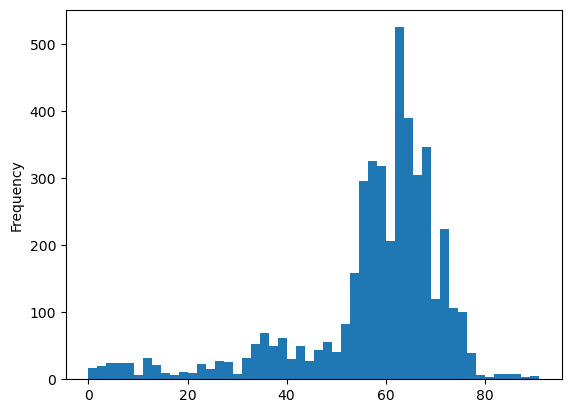

In [14]:
# Check distance between earnings_call_date and fixed_quarter_date
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['days_since_call'] = (pd.to_datetime(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['fixed_quarter_date']) - pd.to_datetime(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['earnings_call_date'])).dt.days

# Summary statistics of days_since_call
print(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['days_since_call'].describe())
# Share under 7 days (possibly a reasonable amount of time to react to earnings call)
print('share under 7 days since call')
print(sum(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['days_since_call'] <= 7) / len(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date))

# Histogram of days_since_call
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['days_since_call'].plot.hist(bins=50)

## Output CSV

In [15]:
# Reorder columns - ticker, fixed_quarter_date, earnings_call_date then all other columns
# Columns to move to the front
cols_to_front = ['ticker', 'fixed_quarter_date', 'earnings_call_date']
# Reorder columns
new_columns_order = cols_to_front + [col for col in credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.columns if col not in cols_to_front]
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date = credit_ratings_on_fixed_quarter_dates_with_earnings_call_date[new_columns_order]

# Save to csv
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.to_csv('~/Box/STAT 222 Capstone/Intermediate Data/credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.csv', index=False)